In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# above line sets the backend of matplotlib to the 'inline' backend:
# With this backend,
# the output of plotting commands is displayed inline within frontends like the Jupyter Notebook,
# directly below the code cell that produced it.
# The resulting plots will then also be stored in the notebook document.
from sklearn.preprocessing import OneHotEncoder

<b>1. Load .xlsx file to a pandas DataFrame.</b>

In [117]:
df = pd.read_excel('igrzyska.xlsx', sheet_name='t201223CRC')
df.head()

,URODZONY,PLEC,KLM6,woj,q9,q10,q11,q12,q13,q14,...,q153,q154,q155,q156,r7s1,r7s2,r7s3,r7s4,r7s5,waga
0,1940,2,1,11,2,4,NaN,13,8.0,1,...,2.0,2,NaN,2,2012,7,4,18,42,0.722004
1,1943,1,3,11,8,4,NaN,13,3.0,1,...,NaN,2,NaN,2,2012,7,4,16,43,0.686766
2,1936,1,3,11,8,4,NaN,13,3.0,1,...,NaN,2,NaN,1,2012,7,4,18,16,0.686766
3,1948,1,3,11,4,4,NaN,13,6.0,1,...,2.0,2,NaN,2,2012,7,4,19,43,1.604806
4,1994,2,1,10,3,4,NaN,11,11.0,2,...,NaN,1,2.0,1,2012,7,5,11,17,1.316088


<b>2. Create a column named 'error' containing prediction error between 'q93' column value and a real number of golden medals acquired by Poland on the 2012 Olympic Games.</b>

In [118]:
print('Number of not-NA values in column q93: \t {0}'.format(df['q93'].count()),
      '\nNumber of NA values in q93 column: \t {0}'.format(df['q93'].isna().count()),
      '\nq93 column median: \t\t\t {0}'.format(np.nanmedian(df['q93'])),
      '\nq93 column mean: \t\t\t {0}'.format(np.nanmean(df['q93'])))

df.loc[df['q93'].isna(), ['q93']] = np.nanmedian(df['q93'])
df['error'] = df['q93'] - 11
df['error']

Number of not-NA values in column q93: 	 692 
Number of NA values in q93 column: 	 960 
q93 column median: 			 10.0 
q93 column mean: 			 9.693641618497109


0     -4.0
1     -1.0
2     -1.0
3      3.0
4     -1.0
5     -1.0
6     -6.0
7     -1.0
8     -6.0
9     -1.0
10    -1.0
11    -6.0
12    -3.0
13    -6.0
14    -6.0
15     0.0
16    -4.0
17     0.0
18    -3.0
19    -1.0
20    -1.0
21    -1.0
22     4.0
23     1.0
24    -1.0
25    -1.0
26     1.0
27    -1.0
28    -1.0
29    -1.0
      ... 
930   -1.0
931   -1.0
932   -1.0
933   -1.0
934   -1.0
935   -1.0
936   -6.0
937   -1.0
938   -1.0
939    1.0
940    1.0
941   -4.0
942    1.0
943    1.0
944   -1.0
945   -7.0
946   -1.0
947    1.0
948   -1.0
949   -7.0
950   -7.0
951   -6.0
952    4.0
953   -6.0
954    4.0
955   -7.0
956    4.0
957    4.0
958   -6.0
959    0.0
Name: error, Length: 960, dtype: float64

<b>3. Count correct predictions and show the rows that describe them.</b>

In [119]:
print('Number of correct predictions: \t {0}'.format(df[df['q93'] == 11]['q93'].count()))
print(df[df['q93'] == 11]['q93'])
df[df['q93'] == 11]

Number of correct predictions: 	 30
15     11.0
17     11.0
172    11.0
197    11.0
217    11.0
274    11.0
291    11.0
300    11.0
309    11.0
334    11.0
354    11.0
438    11.0
508    11.0
539    11.0
544    11.0
574    11.0
593    11.0
602    11.0
604    11.0
639    11.0
670    11.0
683    11.0
702    11.0
789    11.0
790    11.0
809    11.0
826    11.0
914    11.0
917    11.0
959    11.0
Name: q93, dtype: float64


,URODZONY,PLEC,KLM6,woj,q9,q10,q11,q12,q13,q14,...,q154,q155,q156,r7s1,r7s2,r7s3,r7s4,r7s5,waga,error
15,1936,1,5,13,12,4,NaN,13,2.0,1,...,2,NaN,1,2012,7,5,17,56,0.639548,0.0
17,1986,2,5,12,11,4,NaN,14,5.0,2,...,2,NaN,1,2012,7,5,18,29,0.525158,0.0
172,1988,2,1,13,8,2,3.0,5,NaN,2,...,1,1.0,2,2012,7,7,12,27,0.749091,0.0
197,1985,1,1,6,4,4,NaN,6,NaN,2,...,1,1.0,1,2012,7,7,14,52,1.772485,0.0
217,1969,1,1,15,10,1,3.0,10,NaN,1,...,2,NaN,1,2012,7,7,12,15,0.987732,0.0
274,1952,2,1,2,2,4,NaN,13,6.0,1,...,1,3.0,2,2012,7,7,14,11,0.631724,0.0
291,1968,1,3,16,4,1,3.0,10,NaN,2,...,2,NaN,1,2012,7,7,12,41,1.055805,0.0
300,1980,2,5,12,11,1,3.0,4,NaN,2,...,2,NaN,1,2012,7,7,17,21,0.811256,0.0
309,1960,2,1,11,4,4,NaN,16,6.0,2,...,1,4.0,1,2012,7,7,10,43,1.288454,0.0
334,1957,2,4,1,11,1,1.0,2,NaN,2,...,2,NaN,1,2012,7,5,16,47,1.243574,0.0


<b>4. Draw plots visualizing prediction value change over the year of the responder.</b>

In [120]:
df_temp = df.copy()
print(f"=== People born before 1930 === \n{df_temp[df_temp['URODZONY'] < 1930]['q93'].value_counts()}",
      f"\n\n=== People born in the 30s === \n{df_temp[(df_temp['URODZONY'] > 1929) & (df_temp['URODZONY'] < 1940)]['q93'].value_counts()}",
      f"\n\n=== People born in the 60s === \n{df_temp[(df_temp['URODZONY'] > 1959) & (df_temp['URODZONY'] < 1970)]['q93'].value_counts()}")

print(f"\n=== People born before 1930 === \n{df_temp[df_temp['URODZONY'] < 1930]['q93'].describe()}",
      f"\n\n=== People born in the 30s === \n{df_temp[(df_temp['URODZONY'] > 1929) & (df_temp['URODZONY'] < 1940)]['q93'].describe()}",
      f"\n\n=== People born in the 60s === \n{df_temp[(df_temp['URODZONY'] > 1959) & (df_temp['URODZONY'] < 1970)]['q93'].describe()}")

=== People born before 1930 === 
10.0    15
15.0     2
5.0      1
3.0      1
8.0      1
Name: q93, dtype: int64 

=== People born in the 30s === 
10.0    48
5.0      6
12.0     5
8.0      4
20.0     2
15.0     2
13.0     2
3.0      2
14.0     1
6.0      1
2.0      1
11.0     1
Name: q93, dtype: int64 

=== People born in the 60s === 
10.0    83
12.0    11
8.0      9
15.0     8
5.0      8
7.0      5
11.0     5
6.0      3
14.0     3
13.0     2
3.0      2
2.0      2
1.0      2
4.0      2
Name: q93, dtype: int64

=== People born before 1930 === 
count    20.000000
mean      9.800000
std       2.587419
min       3.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      15.000000
Name: q93, dtype: float64 

=== People born in the 30s === 
count    75.000000
mean      9.826667
std       2.956319
min       2.000000
25%      10.000000
50%      10.000000
75%      10.000000
max      20.000000
Name: q93, dtype: float64 

=== People born in the 60s === 
count    145.000000
mean    

Text(0, 0.5, 'Number of medals predicted')

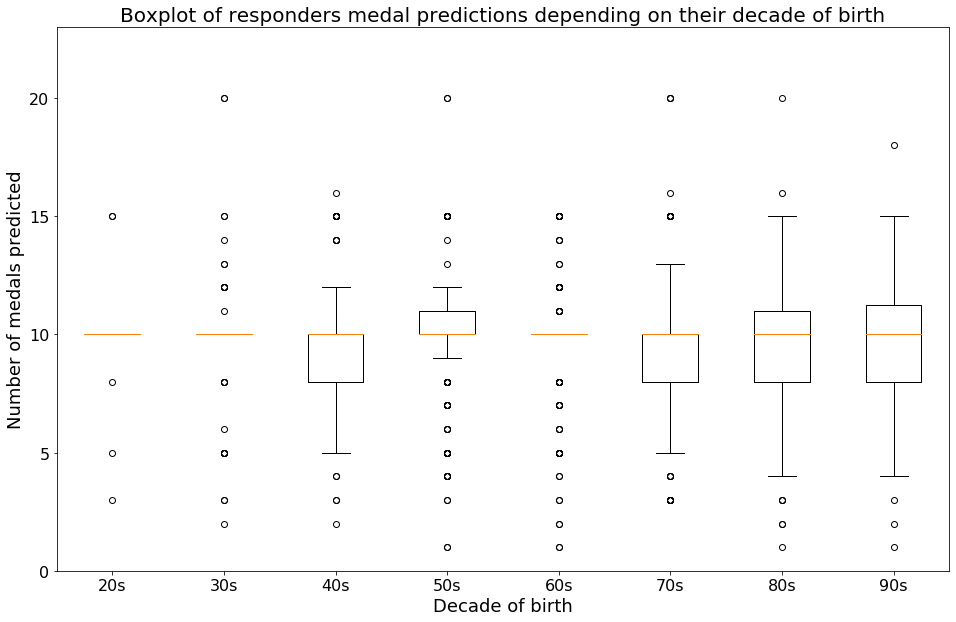

In [121]:
# boxplot
plt.figure(figsize=(16,10))
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

plt.boxplot((df_temp[df_temp['URODZONY'] < 1930]['q93'], 
             df_temp[(df_temp['URODZONY'] > 1929) & (df_temp['URODZONY'] < 1940)]['q93'],
             df_temp[(df_temp['URODZONY'] > 1939) & (df_temp['URODZONY'] < 1950)]['q93'],
             df_temp[(df_temp['URODZONY'] > 1949) & (df_temp['URODZONY'] < 1960)]['q93'],
             df_temp[(df_temp['URODZONY'] > 1959) & (df_temp['URODZONY'] < 1970)]['q93'],
             df_temp[(df_temp['URODZONY'] > 1969) & (df_temp['URODZONY'] < 1980)]['q93'],
             df_temp[(df_temp['URODZONY'] > 1979) & (df_temp['URODZONY'] < 1990)]['q93'],
             df_temp[(df_temp['URODZONY'] > 1989) & (df_temp['URODZONY'] < 2000)]['q93']),
            labels=['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s'])

plt.ylim(0, 23)
plt.title('Boxplot of responders medal predictions depending on their decade of birth', fontsize=20)
plt.xlabel('Decade of birth', fontsize=18)
plt.ylabel('Number of medals predicted', fontsize=18)

Text(0.5, 0.98, 'Histogram of responders medal predictions depending on their decade of birth')

<Figure size 1152x1152 with 0 Axes>

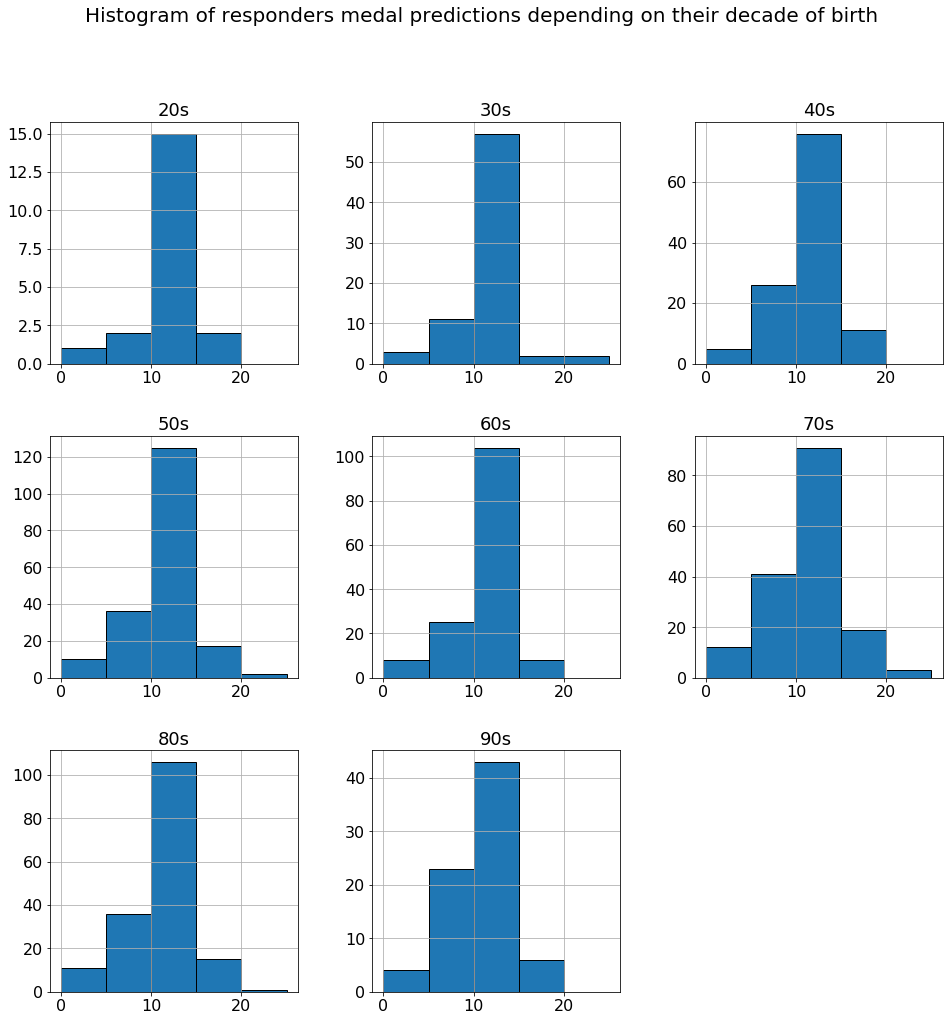

In [122]:
# histogram
plt.figure(figsize=(16,16))
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 18

df_decades = pd.DataFrame({'20s': df_temp[df_temp['URODZONY'] < 1930]['q93'],
                           '30s': df_temp[(df_temp['URODZONY'] > 1929) & (df_temp['URODZONY'] < 1940)]['q93'],
                           '40s': df_temp[(df_temp['URODZONY'] > 1939) & (df_temp['URODZONY'] < 1950)]['q93'],
                           '50s': df_temp[(df_temp['URODZONY'] > 1949) & (df_temp['URODZONY'] < 1960)]['q93'],
                           '60s': df_temp[(df_temp['URODZONY'] > 1959) & (df_temp['URODZONY'] < 1970)]['q93'],
                           '70s': df_temp[(df_temp['URODZONY'] > 1969) & (df_temp['URODZONY'] < 1980)]['q93'],
                           '80s': df_temp[(df_temp['URODZONY'] > 1979) & (df_temp['URODZONY'] < 1990)]['q93'],
                           '90s': df_temp[(df_temp['URODZONY'] > 1989) & (df_temp['URODZONY'] < 2000)]['q93']})

df_decades.hist(bins=[0, 5, 10, 15, 20, 25],# 1, 5, 10, 15, 20, 26
                figsize=(16, 16),
                ec='black')

plt.suptitle('Histogram of responders medal predictions depending on their decade of birth', fontsize=20)

<b>5. Check correlation between prediction error column and column containing job group of the responder (excluding NA values).</b>

In [123]:
print('=== Correlation measures between error column and gender column ===',
      '\nPearson method: \t {0}'.format(df['error'].corr(df['PLEC'], method='pearson')),
      '\nKendall method: \t {0}'.format(df['error'].corr(df['PLEC'], method='kendall')),
      '\nSpearman method: \t {0}'.format(df['error'].corr(df['PLEC'], method='spearman')))

=== Correlation measures between error column and gender column === 
Pearson method: 	 0.02431993830757109 
Kendall method: 	 0.016038513898141937 
Spearman method: 	 0.01789272694046741


<b>6. One-hot Encoder used to encode values in a 'woj' column (voivodeship of the responder).</b>

In [124]:
one_hot_encoder = OneHotEncoder(categories='auto')
one_hot_encoder.fit(df['woj'].unique().reshape(-1, 1))

one_hot_encoded_voivodeship = one_hot_encoder.transform(df['woj'].to_numpy().reshape(-1, 1)).toarray()

print(one_hot_encoded_voivodeship[: 5])
df.head()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


,URODZONY,PLEC,KLM6,woj,q9,q10,q11,q12,q13,q14,...,q154,q155,q156,r7s1,r7s2,r7s3,r7s4,r7s5,waga,error
0,1940,2,1,11,2,4,NaN,13,8.0,1,...,2,NaN,2,2012,7,4,18,42,0.722004,-4.0
1,1943,1,3,11,8,4,NaN,13,3.0,1,...,2,NaN,2,2012,7,4,16,43,0.686766,-1.0
2,1936,1,3,11,8,4,NaN,13,3.0,1,...,2,NaN,1,2012,7,4,18,16,0.686766,-1.0
3,1948,1,3,11,4,4,NaN,13,6.0,1,...,2,NaN,2,2012,7,4,19,43,1.604806,3.0
4,1994,2,1,10,3,4,NaN,11,11.0,2,...,1,2.0,1,2012,7,5,11,17,1.316088,-1.0


<b>7. Describe 5 columns showing number of each value occurences, number of NA values, mean, median, quartiles, max and min (if possible).</b> 

In [125]:
def describe_quantitative_column(column, column_name):
    print('=== {0} column description ==='.format(column_name),
          '\nNA values  {0}'.format(column.isna().sum()),
          '\nvar \t  {0}'.format(np.nanvar(column)),
          '\n{0}'.format(column.describe()),
          '\nValue  count\n{0}\n'.format(column.value_counts()))

def describe_qualitative_column(column, column_name):
    print('=== {0} column description ==='.format(column_name),
          '\nNA values  {0}'.format(column.isna().sum()),
          '\nValue  count\n{0}\n'.format(column.value_counts()))

def describe_opinion_column(column, column_name):
    print('=== {0} column description ==='.format(column_name),
          '\nNA values  {0}'.format(column.isna().sum()),
          '\nNot-sure values\t{0}'.format(column[column > 11].count()),
          '\nvar \t  {0}'.format(np.nanvar(column[column < 12])),
          '\n{0}'.format(column[column < 12].describe()),
          '\nValue  count\n{0}\n'.format(column.value_counts()))
    
def describe_education_column(column, column_name):
    print('=== {0} column description ==='.format(column_name),
          '\nNA values  {0}'.format(column.isna().sum()),
          '\n{0}'.format(column.quantile([.25, .5, .75])),
          '\nValue  count\n{0}\n'.format(column.value_counts()))
    
describe_quantitative_column(df['error'], 'Prediction error')
describe_qualitative_column(df['woj'], 'Voivodeship')
describe_education_column(df['q9'], 'Education')
describe_opinion_column(df['q38s14'], 'Opinion about Sławomir Nowak')
describe_opinion_column(df['q38s21'], 'Opinion about Andrzej Seremet')

=== Prediction error column description === 
NA values  0 
var 	  10.81998263888889 
count    960.000000
mean      -1.220833
std        3.291089
min      -10.000000
25%       -3.000000
50%       -1.000000
75%       -1.000000
max       39.000000
Name: error, dtype: float64 
Value  count
-1.0     473
 1.0      86
 4.0      76
-3.0      71
-6.0      62
-4.0      34
 0.0      30
-5.0      25
-8.0      21
-7.0      20
 3.0      15
 2.0      13
 9.0       8
-2.0       8
-9.0       7
-10.0      6
 5.0       3
 7.0       1
 39.0      1
Name: error, dtype: int64

=== Voivodeship column description === 
NA values  0 
Value  count
7     125
12    123
15     96
6      73
5      62
1      60
9      58
11     57
3      57
2      56
16     51
14     39
13     35
4      28
8      22
10     18
Name: woj, dtype: int64

=== Education column description === 
NA values  0 
0.25    4.0
0.50    6.0
0.75    8.0
Name: q9, dtype: float64 
Value  count
4     230
8     154
2     147
11    145
6      95
7      53


<b>8. Get the rows which 'q98' column equals 1 and 'q101' column equals 2.</b>

In [126]:
print(df[(df['q98'] == 1) & (df['q101'] == 2)][['q98', 'q101']], '\n')
df[(df['q98'] == 1) & (df['q101'] == 2)]

     q98  q101
3      1     2
6      1     2
9      1     2
10     1     2
16     1     2
19     1     2
21     1     2
23     1     2
24     1     2
26     1     2
28     1     2
31     1     2
43     1     2
44     1     2
46     1     2
47     1     2
48     1     2
51     1     2
52     1     2
53     1     2
54     1     2
60     1     2
63     1     2
64     1     2
70     1     2
71     1     2
73     1     2
79     1     2
81     1     2
84     1     2
..   ...   ...
842    1     2
848    1     2
852    1     2
854    1     2
867    1     2
868    1     2
869    1     2
870    1     2
872    1     2
878    1     2
879    1     2
884    1     2
885    1     2
887    1     2
890    1     2
891    1     2
895    1     2
899    1     2
901    1     2
902    1     2
908    1     2
916    1     2
919    1     2
921    1     2
923    1     2
927    1     2
928    1     2
937    1     2
943    1     2
959    1     2

[246 rows x 2 columns] 



,URODZONY,PLEC,KLM6,woj,q9,q10,q11,q12,q13,q14,...,q154,q155,q156,r7s1,r7s2,r7s3,r7s4,r7s5,waga,error
3,1948,1,3,11,4,4,NaN,13,6.0,1,...,2,NaN,2,2012,7,4,19,43,1.604806,3.0
6,1979,2,5,12,5,1,3.0,3,NaN,2,...,2,NaN,1,2012,7,5,15,58,0.867682,-6.0
9,1976,1,4,9,11,1,3.0,4,NaN,2,...,2,NaN,1,2012,7,5,18,1,1.244349,-1.0
10,1981,1,6,15,1,4,NaN,12,7.0,1,...,2,NaN,1,2012,7,5,18,9,1.779276,-1.0
16,1944,2,5,12,4,4,NaN,13,6.0,1,...,2,NaN,2,2012,7,5,10,54,0.780039,-4.0
19,1970,1,5,1,7,1,1.0,6,NaN,2,...,2,NaN,1,2012,7,5,18,57,1.053443,-1.0
21,1984,2,3,12,11,4,NaN,14,4.0,2,...,2,NaN,1,2012,7,5,17,47,0.551929,-1.0
23,1937,1,3,12,2,4,NaN,13,6.0,1,...,2,NaN,2,2012,7,5,16,55,1.423877,1.0
24,1950,1,4,12,4,4,NaN,12,6.0,1,...,2,NaN,2,2012,7,5,17,28,1.971566,-1.0
26,1951,2,3,12,8,4,NaN,13,4.0,1,...,2,NaN,1,2012,7,5,17,57,0.977475,1.0


<b>9. Create 3 more columns, which are combinations of existing columns.</b>

In [127]:
# column ideas

# column showing day of the week when responder was born depending on its' birth date
# column showing combination of q24s1 and q25s1 columns (political situation in Poland)
# column showing combination of q67s1, q67s2, q67s3, q67s4 (opinion about buddhists)
# column showing combination of q69s1, q69s2, q69s3, q69s4 (opinion about Hare Krishna zealots)

# column showing year of a responder depending on its' birth date
# column showing combination of q24s3 and q25s3 columns (situation in responder's workplace)
# column showing combination of q33, q34, q35 and q36 columns (opinion about Donald Tusk's government)
# column showing combination of q68s1, q68s2, q68s3, q68s4 (opinion about Jehowa witnesses)


# column showing decade of a responder depending on its' birth date
def create_decade_column():
    df['decade'] = (df['URODZONY'] - (df['URODZONY'] % 10)) % 100

# column showing combination of q24s2 and q25s2 columns 
# (economical situation in Poland)
def create_economical_opinion_column():
    opinion_today = df['q24s2'].copy()
    opinion_today[opinion_today > 6] = 3
    
    opinion_next_year = df['q25s2'].copy()
    opinion_next_year[opinion_next_year > 6] = 3
    
    df['economical_opinion'] = (2 * (6 - opinion_today) + (6 - opinion_next_year)) / 3

# column showing combination of q38s1, q38s2, q38s3, q38s4, q38s9, q38s10, q38s13, q38s14, q38s17, q38s19, q38s20, q38s22, q38s23, q38s24
# (opinion about politics of the ruling party)
def create_politicians_opinion_column():
    arlukowicz_opinion = df['q38s1'].copy()
    arlukowicz_opinion[arlukowicz_opinion > 11] = 6
    
    boni_opinion = df['q38s2'].copy()
    boni_opinion[boni_opinion > 11] = 6
    
    borusewicz_opinion = df['q38s3'].copy()
    borusewicz_opinion[borusewicz_opinion > 11] = 6
    
    cichocki_opinion = df['q38s4'].copy()
    cichocki_opinion[cichocki_opinion > 11] = 6
    
    komorowski_opinion = df['q38s9'].copy()
    komorowski_opinion[komorowski_opinion > 11] = 6
    
    kopacz_opinion = df['q38s10'].copy()
    kopacz_opinion[kopacz_opinion > 11] = 6
    
    mucha_opinion = df['q38s13'].copy()
    mucha_opinion[mucha_opinion > 11] = 6
    
    nowak_opinion = df['q38s14'].copy()
    nowak_opinion[nowak_opinion > 11] = 6
    
    rostowski_opinion = df['q38s17'].copy()
    rostowski_opinion[rostowski_opinion > 11] = 6
    
    sawicki_opinion = df['q38s19'].copy()
    sawicki_opinion[sawicki_opinion > 11] = 6
    
    schetyna_opinion = df['q38s20'].copy()
    schetyna_opinion[schetyna_opinion > 11] = 6
    
    sikorski_opinion = df['q38s22'].copy()
    sikorski_opinion[sikorski_opinion > 11] = 6
    
    tusk_opinion = df['q38s23'].copy()
    tusk_opinion[tusk_opinion > 11] = 6
    
    zdrojewski_opinion = df['q38s24'].copy()
    zdrojewski_opinion[zdrojewski_opinion > 11] = 6
    
    df['politicians_opinion'] = (7 * tusk_opinion + 7 * komorowski_opinion + 6 * schetyna_opinion + 5 * kopacz_opinion
                                 + 5 * sikorski_opinion + 4 * rostowski_opinion + 3 * arlukowicz_opinion
                                 + 3 * borusewicz_opinion + 3 * mucha_opinion + 2 * nowak_opinion + 2 * boni_opinion
                                 + cichocki_opinion + sawicki_opinion + zdrojewski_opinion) / 50

# # column showing combination of q65s1, q65s2, q65s3, q65s4
# # (opinion about muslims)
def create_muslims_opinion_column():
    working_opinion = df['q65s1'].copy()
    working_opinion[working_opinion > 4] = 2
    
    neighbour_opinion = df['q65s2'].copy()
    neighbour_opinion[neighbour_opinion > 4] = 2
    
    boss_opinion = df['q65s3'].copy()
    boss_opinion[boss_opinion > 4] = 2
    
    relative_opinion = df['q65s4'].copy()
    relative_opinion[relative_opinion > 4] = 2
    
    df['muslims_opinion'] = (8 * (5 - relative_opinion) + 5 * (5 - boss_opinion)
                             + 3 * (5 - neighbour_opinion) + 2 * (5 - working_opinion)) / 18

create_decade_column()
create_economical_opinion_column()
create_politicians_opinion_column()
create_muslims_opinion_column()

df[['decade', 'economical_opinion', 'politicians_opinion', 'muslims_opinion']].head(10)

,decade,economical_opinion,politicians_opinion,muslims_opinion
0,40,4.000000,9.46,1.555556
1,40,3.333333,5.68,3.555556
2,30,2.333333,5.50,3.000000
3,40,4.000000,9.04,4.000000
4,90,3.000000,7.48,3.000000
5,20,2.666667,6.50,1.833333
6,70,2.333333,8.04,2.666667
7,30,3.000000,10.02,3.000000
8,70,2.666667,6.54,4.000000
9,70,3.666667,7.46,3.000000


<b>10. Save DataFrame to a csv file.</b>

In [128]:
df.to_csv('igrzyska_list_7.csv')